In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')  # adjust if path differs

# Show basic info
print("Sample rows:\n", df.head())
print("\nLabels distribution:\n", df['label'].value_counts())

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to reduce training time
X = vectorizer.fit_transform(df['features']).toarray()

# Target variable
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nVectorized shape: {X_train.shape}")





Sample rows:
                                             features  label
0  agentactivationruntimestarter.exe AgentService...      0
1  keylogger.exe ratclient.exe logger_payload.exe...      1
2  GetWindowTextW SendMessageW CreateFile ReadFil...      0
3  SetWindowsHookEx GetAsyncKeyState GetForegroun...      1
4  explorer.exe svchost.exe chrome.exe python.exe...      0

Labels distribution:
 label
0    4
1    4
Name: count, dtype: int64

Vectorized shape: (6, 811)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load CSV
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')

# Display class distribution
print("Class distribution:\n", df['label'].value_counts())

# Vectorize 'features' column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['features'])

# Labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

# Function to evaluate a model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)


Class distribution:
 label
0    4
1    4
Name: count, dtype: int64
--- Logistic Regression ---
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2





/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

--- Random Forest ---
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



--- KNN ---
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2





/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd

df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')
print(df.head())


                                            features  label
0  agentactivationruntimestarter.exe AgentService...      0
1  keylogger.exe ratclient.exe logger_payload.exe...      1
2  GetWindowTextW SendMessageW CreateFile ReadFil...      0
3  SetWindowsHookEx GetAsyncKeyState GetForegroun...      1
4  explorer.exe svchost.exe chrome.exe python.exe...      0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_raw = df['features']
y = df['label']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

for name, model in models.items():
    print(f"--- {name} ---")
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')  # 4-fold CV
    print(f"CV Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


--- Logistic Regression ---
CV Accuracy: 0.62 ± 0.22
--- Random Forest ---
CV Accuracy: 0.62 ± 0.22
--- KNN ---
CV Accuracy: 0.50 ± 0.35


In [17]:
for name, model in models.items():
    print(f"--- {name} on Hold-out Test ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))


--- Logistic Regression on Hold-out Test ---
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

--- Random Forest on Hold-out Test ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

--- KNN on Hold-out Test ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg   

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"--- {name} ---")
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"CV Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


--- Logistic Regression ---
CV Accuracy: 0.62 ± 0.22
--- Random Forest ---
CV Accuracy: 0.50 ± 0.00
--- KNN ---
CV Accuracy: 0.50 ± 0.35


In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"--- {name} Detailed Metrics ---")
    y_pred_cv = cross_val_predict(model, X, y, cv=skf)
    print(classification_report(y, y_pred_cv, zero_division=0))


--- Logistic Regression Detailed Metrics ---
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

--- Random Forest Detailed Metrics ---
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8

--- KNN Detailed Metrics ---
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.50      0.50      0.50         4

    accuracy                           0.50         8
   macro avg   

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')
sns.pairplot(df, hue='label')  # replace 'label' with your actual label column name
plt.show()


ValueError: No variables found for grid columns.

In [22]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd

df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  8 non-null      object
 1   label     8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
None
                                            features  label
0  agentactivationruntimestarter.exe AgentService...      0
1  keylogger.exe ratclient.exe logger_payload.exe...      1
2  GetWindowTextW SendMessageW CreateFile ReadFil...      0
3  SetWindowsHookEx GetAsyncKeyState GetForegroun...      1
4  explorer.exe svchost.exe chrome.exe python.exe...      0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

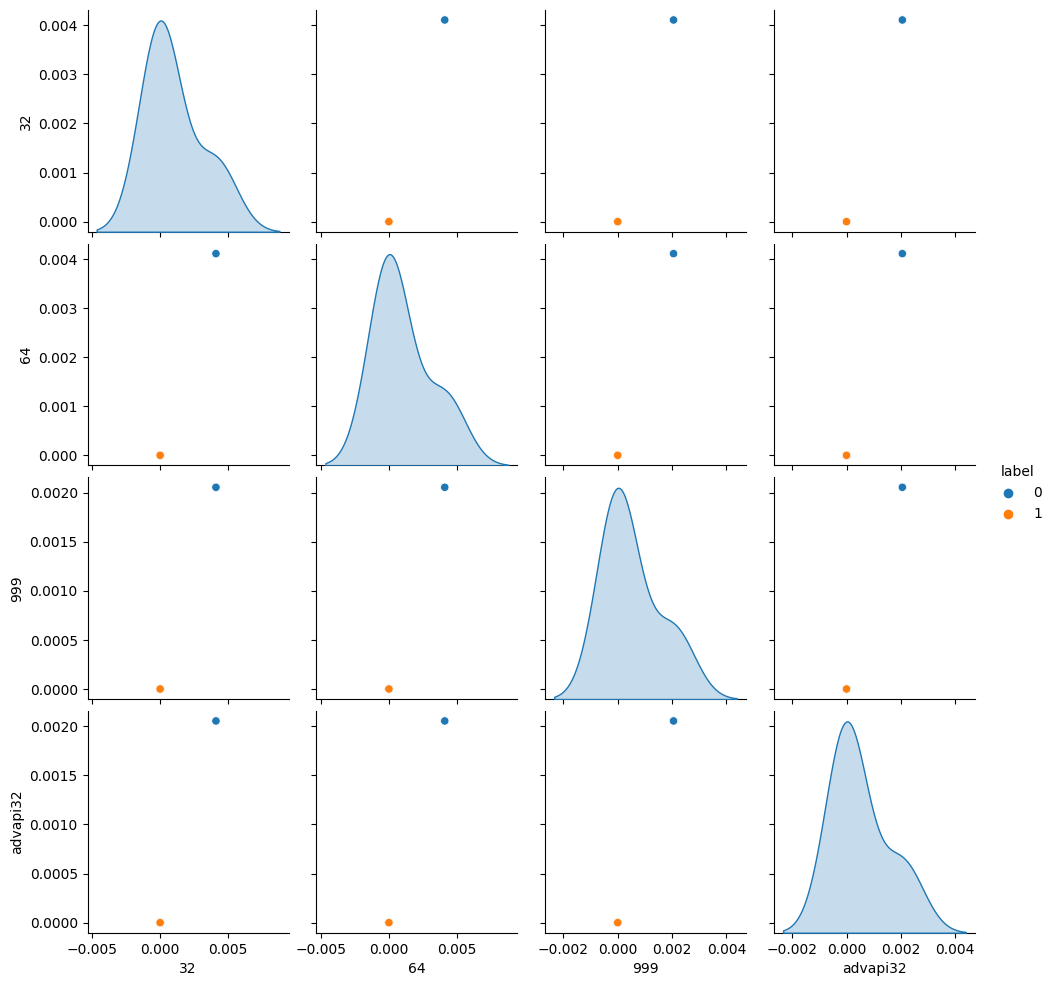

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')

# Step 1: Vectorize the 'features' column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['features'])

# Step 2: Convert to a DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Step 3: Add the label column back
X_df['label'] = df['label']

# Step 4: For plotting, sample only a few feature columns + label
sampled_df = X_df.iloc[:, :4].copy()  # Use first 4 numeric features
sampled_df['label'] = df['label']     # Add label again for pairplot

# Step 5: Plot pairplot
sns.pairplot(sampled_df, hue='label')
plt.show()


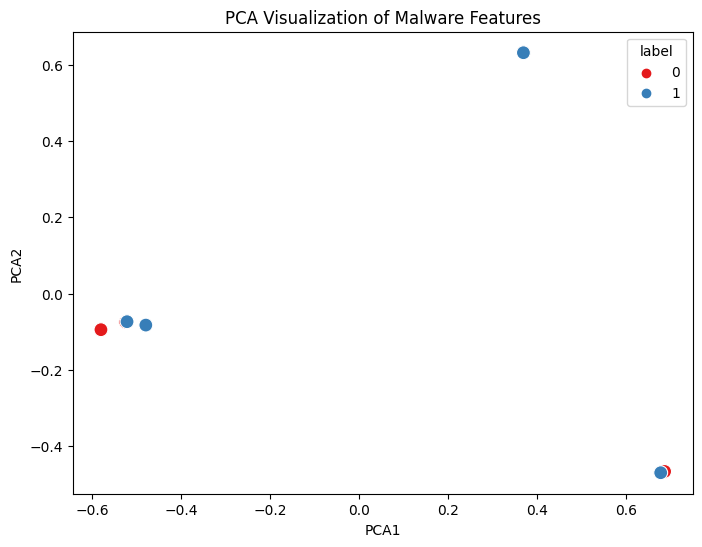

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')

# Vectorize features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['features'])

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = df['label']

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='Set1', s=100)
plt.title('PCA Visualization of Malware Features')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/kaggle/input/datasetcsvfile/features_full.csv")  # or use your existing df

# Convert 'features' text to bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['features'])

# Create a new DataFrame for the vectorized features
feature_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Add the label back
feature_df['label'] = df['label']

# Now you can use pairplot!
sns.pairplot(feature_df, hue='label')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.25, random_state=42
)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF with max 100 features to reduce dimensionality
vectorizer = TfidfVectorizer(max_features=100)

# Fit and transform the features column
X = vectorizer.fit_transform(df['features'])

# Check the shape
print("Shape of transformed data:", X.shape)


Shape of transformed data: (8, 100)


In [31]:
import pandas as pd

# Get feature names and sort by TF-IDF importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().sum(axis=0)

# Create a DataFrame
feature_importance = pd.DataFrame({'feature': feature_names, 'score': tfidf_scores})
feature_importance = feature_importance.sort_values(by='score', ascending=False)

# View top 10
print(feature_importance.head(10))


               feature     score
7                  exe  3.912611
91            software  1.179010
29           microsoft  0.836709
87    setwindowshookex  0.707107
88     setwineventhook  0.707107
10  hkey_local_machine  0.696783
96             windows  0.651566
9    hkey_current_user  0.482227
60                 run  0.482227
3       currentversion  0.482227


In [33]:
from sklearn.model_selection import train_test_split

# X = vectorized features (already done)
y = df['label']  # this is your target

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5

Confusion Matrix:
 [[1 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd

# Match features with their importance scores
feature_importance = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance.head(10))  # Top 10 important features


               feature  importance
27           keylogger    0.146730
88     setwineventhook    0.099884
4                  dll    0.081626
87    setwindowshookex    0.075460
3       currentversion    0.057928
29           microsoft    0.054905
91            software    0.050480
7                  exe    0.046730
60                 run    0.038643
10  hkey_local_machine    0.035752


In [37]:
import joblib

# Load model and vectorizer
clf = joblib.load('rf_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Example new feature (string of API calls)
new_feature = ["OpenProcess SetWindowsHookEx keylogger"]

# Vectorize the input
X_new = vectorizer.transform(new_feature)

# Predict
prediction = clf.predict(X_new)

# Show result
print("Prediction:", prediction[0])  # 0 or 1


FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.pkl'

In [38]:
import joblib

# Use the correct classifier and vectorizer objects (replace `clf` if using another name)
joblib.dump(clf, 'rf_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [39]:
import joblib

# Load saved model and vectorizer
clf = joblib.load('rf_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Example prediction
sample = ["CreateRemoteThread VirtualAllocEx WriteProcessMemory"]
X_sample = vectorizer.transform(sample)
pred = clf.predict(X_sample)
print("Prediction:", "Malicious" if pred[0] == 1 else "Benign")


Prediction: Benign


In [7]:
import joblib

# Use the correct classifier and vectorizer objects (replace `clf` if using another name)
joblib.dump(random_forest, 'rf_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

NameError: name 'random_forest' is not defined

In [8]:
import os
print(os.getcwd())


/kaggle/working


In [9]:
import shutil
shutil.make_archive("KeyloggerModel", 'zip', "/kaggle/working")


'/kaggle/working/KeyloggerModel.zip'

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Sample training process (adapt to your real dataset)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)


NameError: name 'texts' is not defined

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')  # Update path if needed

# Assume you have columns 'text' and 'label'
texts = df['text'].astype(str)
labels = df['label']


KeyError: 'text'

In [12]:
import pandas as pd

# Load the CSV (adjust the path if needed)
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')  # Replace with actual filename if different

# Show column names
print(df.columns)


Index(['features', 'label'], dtype='object')


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib

# Load the dataset
df = pd.read_csv('/kaggle/input/datasetcsvfile/features_full.csv')  # Update the path if needed

# Use the correct column names
texts = df['features'].astype(str)
labels = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

# Save the model and vectorizer
joblib.dump(clf, 'rf_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']